In [24]:
import json
with open('lmg_pretrained_pipeline_v2.json', 'r') as f:
    data = json.load(f)

In [25]:
import matplotlib.pyplot as plt
from statistics import mean, stdev

bce_weights = sorted([i['parameters']['bce_weight'] for i in data])

def statistics_per_key(list_of_dict):
    keys = list_of_dict[0].keys()
    result = {}
    for key in keys:
        result[key] = [mean([i[key] for i in list_of_dict]), stdev([i[key] for i in list_of_dict])]
    return result

statistics = []
for bce in bce_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['bce_weight'] == bce], [])
    datas = []
    for trial in trials:
        best_epoch = trial[-4]
        datas.append(best_epoch)
    statistics.append({'bce_weight': bce, 'statistics': statistics_per_key(datas)})
    print(statistics[-1])


{'bce_weight': 0.25, 'statistics': {'micro_auroc': [0.911343495051066, 0.008444085201859082], 'mcc': [0.5321761017568862, 0.03475756988602847], 'accuracy': [0.9551461935043335, 0.005972097645052179], 'precision': [0.5837992032368978, 0.08947396022528066], 'sensitivity': [0.53322700659434, 0.05839004506731285], 'specificity': [0.9781920711199442, 0.008428346465547853], 'train_bce': [0.005188819077638811, 0.002668439287818135], 'valid_mcc': [0.5807145424966574, 0.01582667339389381]}}
{'bce_weight': 0.5, 'statistics': {'micro_auroc': [0.9197904268900553, 0.005053936593473153], 'mcc': [0.5564497894115752, 0.017633667714734905], 'accuracy': [0.9600749015808105, 0.002634705977884418], 'precision': [0.6476720770200094, 0.05120700683097466], 'sensitivity': [0.5156831443309784, 0.04354194567863175], 'specificity': [0.9843482176462809, 0.0044500114509086], 'train_bce': [0.007799366115006658, 0.0023078411900008286], 'valid_mcc': [0.6037833535769279, 0.013867823315472238]}}
{'bce_weight': 1, 'stat

sensitivity
[0.53322700659434, 0.5156831443309784, 0.5236576298872629, 0.5183413028717041, 0.5523657500743866]
[0.05839004506731285, 0.04354194567863175, 0.04466658466601242, 0.04146730899810791, 0.05516434685408271]
[0.25, 0.5, 1, 2, 4]
specificity
[0.9781920711199442, 0.9843482176462809, 0.9840288162231445, 0.9867294033368429, 0.9817928473154703]
[0.008428346465547853, 0.0044500114509086, 0.0042645215349848605, 0.0027303948447747754, 0.0050617197781621616]
[0.25, 0.5, 1, 2, 4]
accuracy
[0.9551461935043335, 0.9600749015808105, 0.9601850310961405, 0.9624704122543335, 0.959551731745402]
[0.005972097645052179, 0.002634705977884418, 0.0018599380813825713, 0.0007025475940668382, 0.0033577612439940874]
[0.25, 0.5, 1, 2, 4]
precision
[0.5837992032368978, 0.6476720770200094, 0.6462769707043966, 0.682969848314921, 0.6281474630037943]
[0.08947396022528066, 0.05120700683097466, 0.04634338703212855, 0.026982317258003312, 0.04964541816301478]
[0.25, 0.5, 1, 2, 4]
mcc
[0.5321761017568862, 0.5564497

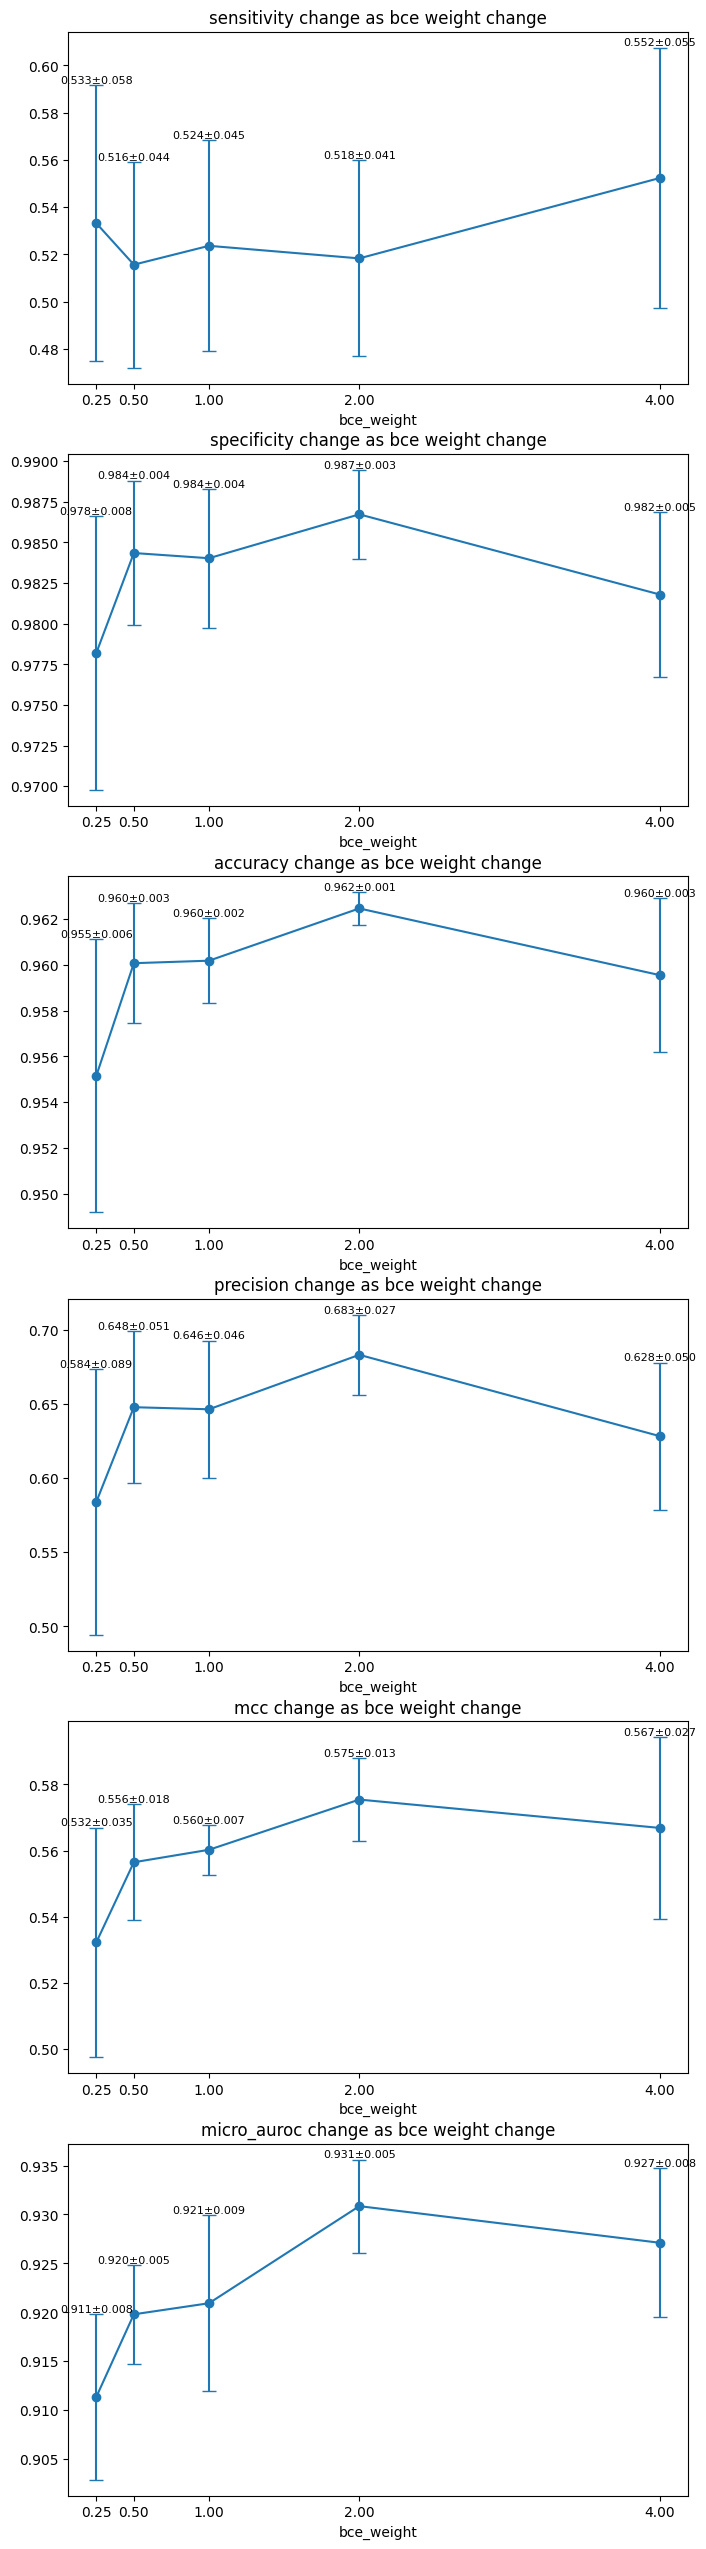

In [26]:
import matplotlib.pyplot as plt

metrics = ['sensitivity', 'specificity', 'accuracy', 'precision', 'mcc', 'micro_auroc']

fig, axs = plt.subplots(6, figsize=(8, 32))

for metric, ax in zip(metrics, axs):
    print(metric)
    metric_avg = [i['statistics'][metric][0] for i in statistics]
    metric_std = [i['statistics'][metric][1] for i in statistics]
    metric_bce_weights = [i['bce_weight'] for i in statistics]
    print(metric_avg)
    print(metric_std)
    print(metric_bce_weights)
    ax.errorbar(metric_bce_weights, metric_avg, yerr=metric_std, fmt='-o', capsize=5)
    ax.set_title(f'{metric} change as bce weight change')
    ax.set_xlabel('bce_weight')
    ax.set_xticks(bce_weights)

    for weight, avg, std in zip(bce_weights, metric_avg, metric_std):
        ax.text(weight, avg+std, f'{avg:.3f}±{std:.3f}', ha='center', va='bottom', fontsize=8)